In [1]:
import sys
import os

REPO_DIR = os.path.join(os.getcwd(), "../../")

from metient.metient import *
from metient.util import data_extraction_util as dutil

import matplotlib
import torch
import pandas as pd
import numpy as np

custom_colors = ["#9e9e9e","#c27ba0", "#be5742e1", "#6fa8dc", "#e69138", "#6aa84f"]
TRACERX_DATA_DIR = os.path.join(REPO_DIR, 'metient/data/tracerx_nsclc/')
PYCLONE_CLUSTERED_TSVS_DIR = os.path.join(TRACERX_DATA_DIR, 'patient_data', 'conipher_pyclone_clustered')
CONIPHER_TREES_DIR = os.path.join(TRACERX_DATA_DIR, 'conipher_outputs', 'TreeBuilding')
OUTPUT_DIR = os.path.join(TRACERX_DATA_DIR, "metient_outputs")

/lila/home/koyyald/mambaforge/envs/met/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA GPU: False


In [2]:
def find_labeling(ref_var_fn, tree, custom_colors, patient_name, output_dir, weights):    
    print_config = PrintConfig(visualize=True, verbose=False, k_best_trees=10)
    evaluate(tree, ref_var_fn, weights, print_config, output_dir, patient_name, O=None,
              bias_weights=True, custom_colors=custom_colors, solve_polytomies=False)

    
def run_conipher_patient(patient, weights, tsv_dir, tree_dir, output_dir):
    space = "x"*44
    tsv_fn = os.path.join(tsv_dir, f"{patient}_clustered_SNVs.tsv")
    print(f"{space} PATIENT {patient} {space}")
    tree_fn = os.path.join(tree_dir, f"{patient}_conipher_SNVsallTrees_cleaned.txt")
    trees = dutil.get_adj_matrices_from_all_conipher_trees(tree_fn)
    find_labeling(tsv_fn, trees[0], custom_colors, patient, output_dir, weights)


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT CRUK0514 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Calculated batch size: 512


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:306: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:297: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:14<00:00,  5.32it/s]


# final solutions: 7


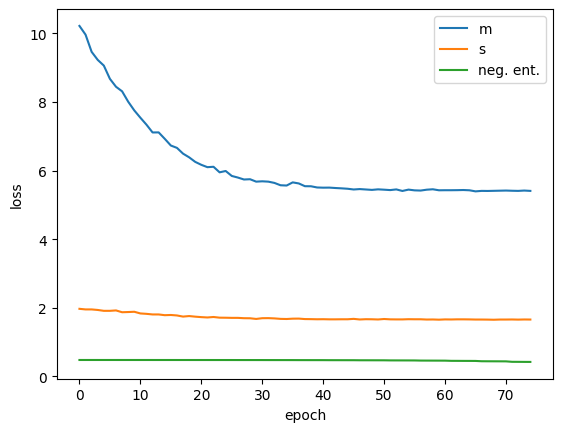

CRUK0514_primary_SU_T1
10 unique trees were not found (7 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

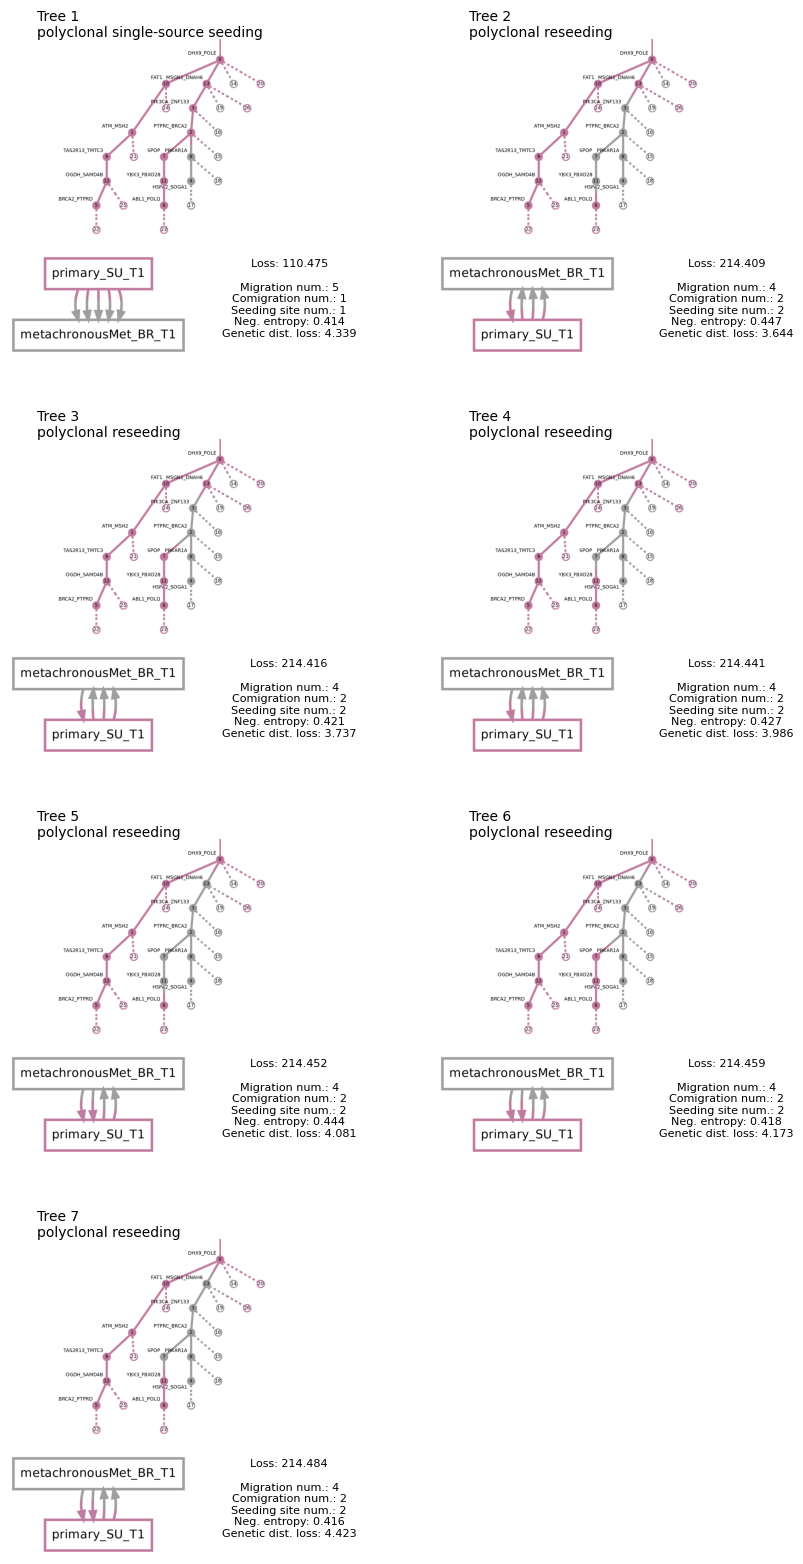

In [3]:
weights = Weights(mig=[1], comig=5.0, seed_site=[100], gen_dist=0.1, organotrop=0.0)

run_conipher_patient("CRUK0514", weights, PYCLONE_CLUSTERED_TSVS_DIR, CONIPHER_TREES_DIR, OUTPUT_DIR)